# Vari modi di ottenere un upper limit in un esperimento di conteggi

In [1]:
import ROOT

Welcome to JupyROOT 6.26/02


## Define the number of observed events and the CL and the number of background values to compute between 0 and 20 

In [4]:
nobs=0
cl=0.95
nsteps=10

## Using N as the test statistics

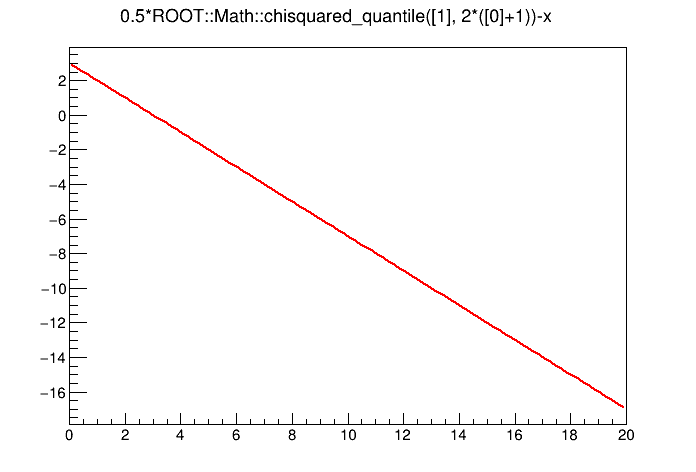

In [6]:
sup_counting = ROOT.TF1('sup_counting', "0.5*ROOT::Math::chisquared_quantile([1], 2*([0]+1))-x", 0, 20)
sup_counting.SetParameter(0, nobs)
sup_counting.SetParameter(1, cl)
sup_counting.Draw()
ROOT.gPad.Draw()

## Using the Likelihood ratio and assuming it is deistributed as a chi2

testing b=1.0 sup=0.9207294142678162 True
testing b=3.0 sup=-1.0792705857480382 True
testing b=5.0 sup=-3.079270585948038 True
testing b=7.0 sup=-5.079270586148038 True
testing b=9.0 sup=-7.079270586348038 True
testing b=11.0 sup=-9.079270586548038 True
testing b=13.0 sup=-11.079270586748038 True
testing b=15.0 sup=-13.079270586948038 True
testing b=17.0 sup=-15.079270587148038 True
testing b=19.0 sup=-17.079270587348038 True


Warning in <TROOT::Append>: Replacing existing TH1: sup_lr (Potential memory leak).
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 20 xmax = 30 npts = 10
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 19 xmax = 29 npts = 10
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 18 xmax = 28 npts = 10
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 17 xmax = 27 npt

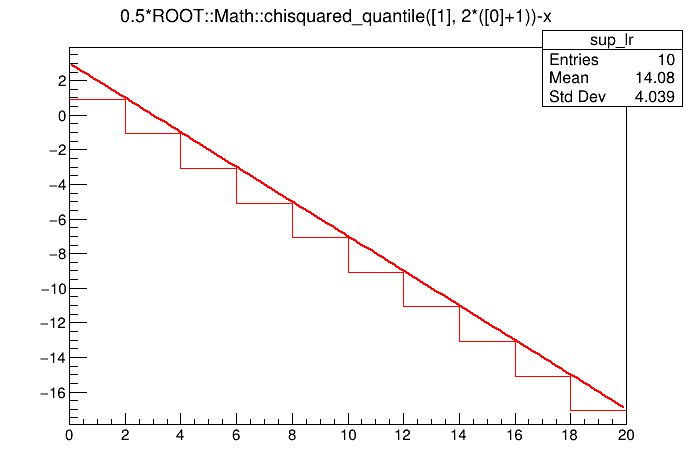

In [10]:
# the following function finds the 0s od the function supplied, which should represent 
# q_s minus the requested quantile.
# This is done for all the values of background corresponding to the bin centers
# of the supplied histogram
# CAVEAT: the code is fragile, the search for the 0s does not always work
def get_sup(f,  sup_h):
  for i in range(1, sup_h.GetXaxis().GetNbins()+1):
    b = sup_h.GetBinCenter(i)
    f.SetParameter(1,b);
    #solve numerically
    wf1 = ROOT.Math.WrappedTF1(f)
    min=20
    brf = ROOT.Math.BrentRootFinder()
    brf.SetNpx(10)
    status=0
    while (status==0 and min>-b):
      brf.SetFunction( wf1, min, 10+min )
      status = brf.Solve()
      min-=1
    sup_h.SetBinContent(i,brf.Root())
    print(f"testing b={b} sup={brf.Root()} {status}")



#the function below is the q_s test statistics, minus 3.84, i.e. the quantile of a chi2 with 1 degree of freedom at 0.95
# x is S
#[0] is the number of observed events
#[1] is the number of background events
qs = ROOT.TF1("qs","-2*log(TMath::Poisson([0], x+[1])/TMath::Poisson([0],[0]))-ROOT::Math::chisquared_quantile([2], 1)", 0, 20)
qs.SetParameter(0,nobs)
qs.SetParameter(2,cl)
sup_lr = ROOT.TH1F("sup_lr", "sup_lr", nsteps, 0, 20)
get_sup(qs, sup_lr)
sup_lr.SetLineColor(ROOT.kRed)
sup_lr.Draw("sames")
ROOT.gPad.Draw()


## Again with the likelihood ratio, but not assuming it is distributed as a chi2 and throwing toys instead

testing b=1.0 sup=2.0492488736219734 True
testing b=3.0 sup=0.04275000239470487 True
testing b=5.0 sup=-1.9447508990336428 True
testing b=7.0 sup=-3.8786872448347283 True
testing b=9.0 sup=-5.993750004602522 True
testing b=11.0 sup=-7.993750001610446 True
testing b=13.0 sup=-10.763750001947528 True
testing b=15.0 sup=-11.961250001883464 True
testing b=17.0 sup=-13.961249282465994 True
testing b=19.0 sup=-15.787787691957073 True


Info in <TUnixSystem::ACLiC>: creating shared library /home/lenzip/Documents/AnalisiDati2021/conda/./get_quantile_qs_C.so
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 20 xmax = 30 npts = 10
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 19 xmax = 29 npts = 10
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethods::MinimStep>: xmin = 18 xmax = 28 npts = 10
Error in <ROOT::Math::BrentRootFinder>: Interval does not contain a root
Info in <ROOT::Math::BrentMethods::MinimStep>: Grid search failed to find a root in the  interval 
Info in <ROOT::Math::BrentMethod

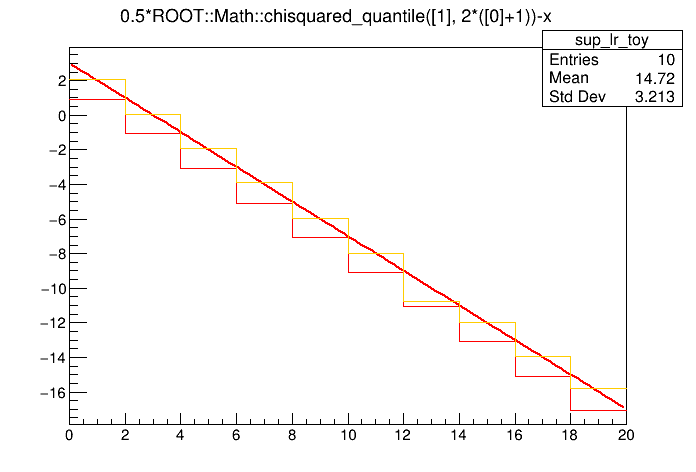

In [11]:
# Same as above, but not assuming that q_s is distributed as a chi2.
# The quantile is determined numerically throwing poissonian toys with s(aka x)+b number of events and filling a histogram 
# of the corresponding value of q_s. The quantile is determined numerically on the histogram.
# The determination of the quantile is done in the get_quantile_qs function, that takes 3 argument:
# the integral (0.95), the background tested ([1]) and the signal tested (x)

ROOT.gROOT.LoadMacro("get_quantile_qs.C+")
qs_toy = ROOT.TF1("qs_toy","-2*log(TMath::Poisson([0], x+[1])/TMath::Poisson([0],[0]))-get_quantile_qs([2], [1], x)", 0, 20)
qs_toy.SetParameter(0, nobs)
qs_toy.SetParameter(2, cl)
sup_lr_toy = ROOT.TH1F("sup_lr_toy", "sup_lr_toy", nsteps, 0, 20)
get_sup(qs_toy, sup_lr_toy)
sup_lr_toy.SetLineColor(ROOT.kOrange)
sup_lr_toy.Draw("sames")
ROOT.gPad.Draw()


## Now using the qs_tilde test statistics, still evaluatig its distribution with toys

In [ ]:
ROOT.gROOT.LoadMacro("get_quantile_qs.C+")
qs_fc_toy = ROOT.TF1("qs_fc_toy","-2*log(TMath::Poisson([0], x+[1])/TMath::Poisson([0],max([0]-[1], 0.)+[1]))-get_quantile_qs([2], [1], x, true)", 0, 20)
qs_fc_toy.SetParameter(0, nobs)
qs_fc_toy.SetParameter(2, cl)
sup_lr_fc_toy = ROOT.TH1F("sup_lr_fc_toy", "sup_lr_toy", nsteps, 0, 20)
get_sup(qs_fc_toy, sup_lr_fc_toy)
sup_lr_fc_toy.SetLineColor(ROOT.kMagenta)
sup_lr_fc_toy.Draw("sames")
ROOT.gPad.Draw()

testing b=1.0 sup=2.2337500023929917 True
testing b=3.0 sup=1.495249998612205 True
testing b=5.0 sup=1.3752500026700056 True
testing b=7.0 sup=1.5075219982239318 True
testing b=9.0 sup=1.3302500032053841 True
testing b=11.0 sup=1.5082722225439409 True
